<div style="display: flex; background-color: RGB(255,154,100);" >
  <h1 style="margin: auto; padding: 30px; text-align: center;">
    <span>ETUDE DE MARCHÉ / LA POULE QUI CHANTE</span><br>
    <span>Clustering et visualisations</span>
  </h1>
</div>

# OBJECTIFS DE CE NOTEBOOK
#### - Réaliser un **K-means** et une **CAH**.
#### - Réaliser une **ACP** et un **clustering**.
#### - Trouver le **groupement de pays le plus pertinent**.

# Sommaire

- [Etape 1 - Importation des librairies et chargement des fichiers](#etape-1)
  - [1.1 Importation des librairies](#1-1)
  - [1.2 Importation des données](#1-2)
  - [1.3 Scaling](#1-3)
- [Etape 2 - K means](#etape-2)
  - [2.1 Définition et conditions d'utilisation](#2-1)
  - [2.2 Mise en place](#2-2)
    - [2.2.1 Méthode du coude](#2-2-1)
    - [2.2.2 Projection des clusters](#2-2-2)
  - [2.3 Analyse des clusters](#2-3)
    - [2.3.1 Centroïdes](#2-3-1)
    - [2.3.2 Visualisations](#2-3-2)
  - [2.4 Conclusions](#2-4)
- [Etape 3 - Classification Ascendante Hiérarchique (CAH)](#etape-3)
  - [3.1 Définition et conditions d'utilisation](#3-1)
  - [3.2 Mise en place](#3-2)
  - [3.3 Conclusions](#3-3)
- [Etape 4 - Analyse en Composantes Principales (ACP)](#etape-4)
  - [4.1 Définition et conditions d'utilisation](#4-1)
  - [4.2 Mise en place](#4-2)
    - [4.2.1 Variation expliquée et tracé d'éboulis](#4-2-1)
    - [4.2.2 Composantes](#4-2-2)
    - [4.2.3 Cercles des corrélations](#4-2-3)
    - [4.2.4 Projection des individu](#4-2-4)
  - [4.3 Conclusions](#4-3)

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-1" style="margin: auto; padding: 20px; ">Etape 1 - Importation des librairies et chargement des données</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="1-1"style="margin: auto; padding: 20px; color: RGB(255,184,100); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
# Importation de la librairie Pandas
import pandas as pd
# Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
# Importation de la librairie Seaborn
import seaborn as sns
# Importation de la librairie Plotly
import plotly.express as px
# Importation de la librairie Numpy
import numpy as np
# K-means
from sklearn.preprocessing import MaxAbsScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# CAH 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
!pip install pandas

Liste des librairies utilisés :
- pandas (2.2.2)
- numpy (1.26.4)
- python-dateutil (2.8.2)
- pytz (2023.3.post1)
- tzdata (2023.3)
- six (1.16.0)

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">1.2 - Importation des données</h3>
</div>

In [6]:
# Importation du fichier données.csv
chemin_fichier_donnees = '/Users/adrianaguilera/Desktop/P11/donnees_exportees.xlsx'
donnees = pd.read_excel(chemin_fichier_donnees)

# Verification de l'importation
donnees.head()

,Pays,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite
0,Afrique du Sud,63212384,6022,37.49,30.97,4.81,-0.67,3.7,4.0
1,Albanie,2745972,8575,23.31,6.56,17.12,0.18,2.5,18.8
2,Algérie,46164219,5364,5.96,5.96,0.00,-0.58,2.5,31.1
3,Allemagne,83280000,54343,17.56,18.10,9.47,0.59,4.1,21.5
4,Angola,36749906,2308,10.18,1.61,8.60,-0.34,2.1,9.0


<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="1-3" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">1.3 - Scaling</h3>
</div>

#### Nous allons maintenant “**scaler**” les données, c’est à dire les mettre à une **échelle commune** pour éviter que certaines valeurs dominent les autres en raison de leur grandeur. 
#### Nous utiliserons la **méthode du MaxAbsScaler** : elle va **transformer les données** pour qu’elles soient comprises **entre -1 et 1**.
##### **Pourquoi l'utiliser ?**
##### - Les données contiennent des **valeurs négatives et positives**.
##### - Pour **normaliser l'amplitude des données**.

In [7]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = donnees.select_dtypes(include=["number"])
# Instancier et appliquer StandardScaler
scaler = MaxAbsScaler()
donnees2 = scaler.fit_transform(colonnes_numeriques)
# Convertir en DataFrame avec les mêmes noms de colonnes
donnees2 = pd.DataFrame(donnees2, columns=colonnes_numeriques.columns)
# Arrondir à 2 décimales
donnees2 = donnees2.round(2)
# Ajouter la colonne "Pays" pour conserver l'identité des pays
donnees2.insert(0, "Pays", donnees["Pays"])
# Afficher un aperçu
(donnees2.describe()).round(2)

,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.04,0.17,0.34,0.27,0.13,-0.03,0.72,0.38
std,0.13,0.20,0.24,0.25,0.19,0.33,0.14,0.21
min,0.00,0.00,0.01,0.00,0.00,-1.00,0.45,0.04
25%,0.00,0.03,0.14,0.04,0.02,-0.19,0.60,0.23
50%,0.01,0.09,0.30,0.24,0.07,0.01,0.69,0.35
75%,0.03,0.25,0.49,0.40,0.16,0.24,0.83,0.51
max,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.00


<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-2" style="margin: auto; padding: 20px; ">Etape 2 - K means</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.1 - Définition et conditions d'utilisation</h3>
</div>

#### **Le K-means est un algorithme de clustering** (ou classification non supervisée) qui permet de regrouper des observations en K groupes homogènes, basés sur leurs caractéristiques.

#### **Principe** : l’algorithme cherche à minimiser la variance intra-cluster, c’est-à-dire que les points d’un même groupe doivent être proches les uns des autres, et éloignés des autres groupes. 

#### **Quand l'utiliser ?**

#### - Lorsque l’on cherche à **segmenter des données en groupes distincts**.
#### - Quand on a **une grande quantité de données** et qu’on veut les structurer.

#### *Il est moins efficace si les clusters sont de formes complexes ou de tailles très inégales.
#### *Il faut choisir K à l’avance, souvent avec la méthode du coude.


#### **Il fonctionne en plusieurs étapes :**
#### 1.	**Choix du nombre de clusters K** (fixé à l’avance).
#### 2.	**Initialisation** : on place aléatoirement K centroïdes (points représentant chaque cluster).
#### 3.	**Affectation des points** : chaque observation est assignée au cluster du centroïde le plus proche.
#### 4.	**Recalcul des centroïdes** : on met à jour la position des centroïdes en prenant la moyenne des points de chaque cluster.
#### 5.	**Répétition des étapes 3 et 4 jusqu’à stabilisation** : plus aucun point ne change de cluster ou un critère d’arrêt est atteint).

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2 - Mise en place</h3>
</div>

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="2-2-1" style="margin: auto; padding: 20px; color: RGB(255,220,100);">2.2.1 - Méthode du coude</h3>
</div>

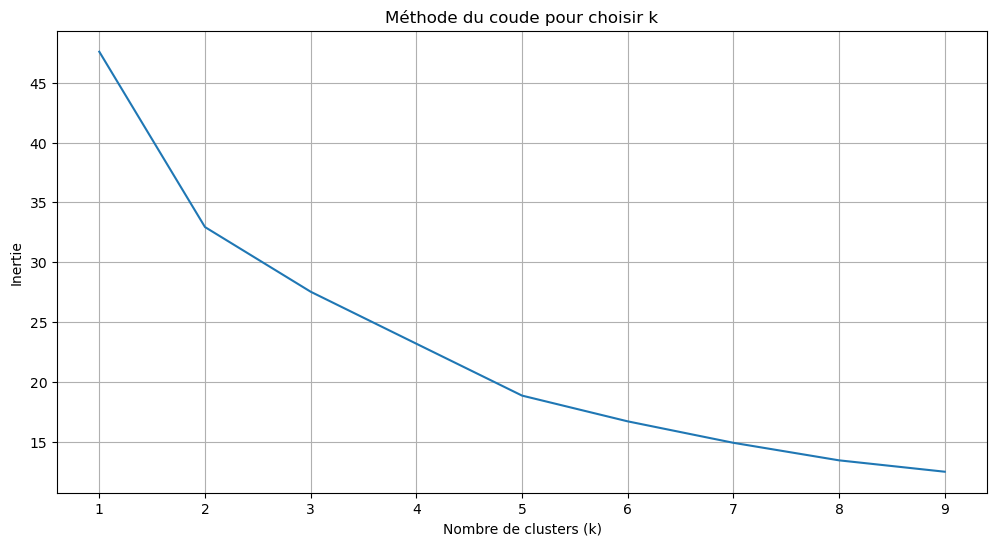

In [8]:
# Faire les calculs 
donnees2_numeric = donnees2.drop(columns=["Pays"])
donnees2_numeric2 = donnees2.drop(columns=["Pays"])
# Une liste vide pour enregistrer les inerties :  
inertia_list = []
# Notre liste de nombres de clusters : 
k_list = range(1, 10)
# Pour chaque nombre de clusters : 
for k in k_list : 
    # On instancie un k-means pour k clusters avec n_init=10
    kmeans = KMeans(n_clusters=k, n_init=10)  
    # On entraine
    kmeans.fit(donnees2_numeric)
    # On enregistre l'inertie obtenue : 
    inertia_list.append(kmeans.inertia_)

# Afficher le graphique
fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylabel("Inertie")  
ax.set_xlabel("Nombre de clusters (k)")  
ax.plot(k_list, inertia_list, linestyle="-")  
plt.title("Méthode du coude pour choisir k")
plt.grid()
plt.show()

La dernière cassure la plus forte est 5. Nous aurons donc **5 clusters**.

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="2-2-2" style="margin: auto; padding: 20px; color: RGB(255,220,100);">2.2.2 - Projection des clusters</h3>
</div>

In [9]:
# Définition du modèle avec 5 clusters et initialisation k-means++
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
# Entraînement du modèle sur les données numériques
kmeans.fit(donnees2_numeric)
# Récupération des labels des clusters
labels = kmeans.labels_
# Récupération des centroïdes
centroids = kmeans.cluster_centers_
# Affichage des résultats
print("Centroïdes des clusters :")
print(centroids)
print("\nNombre d'éléments par cluster :")
print(np.bincount(labels))

Centroïdes des clusters :
[[ 0.01388889  0.36694444  0.35083333  0.33694444  0.15611111  0.26888889
   0.86638889  0.48055556]
 [ 0.0025      0.3025      0.81        0.0875      0.715       0.24375
   0.78125     0.20375   ]
 [ 0.03769231  0.01769231  0.13461538  0.10538462  0.04230769 -0.74153846
   0.56076923  0.39384615]
 [ 0.03727273  0.14045455  0.62772727  0.64954545  0.05636364 -0.05454545
   0.705       0.36090909]
 [ 0.0593617   0.04085106  0.18319149  0.11914894  0.08191489 -0.08723404
   0.65319149  0.33468085]]

Nombre d'éléments par cluster :
[36  8 13 22 47]


In [10]:
# Renseigner le nombre de clusters dans le calcul
kmeans = KMeans(n_clusters=5)
kmeans.fit(donnees2_numeric)
# Créer la colonne Cluster
donnees2_numeric["cluster"] = kmeans.labels_
donnees2_numeric

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite,cluster
0,0.04,0.05,0.50,0.42,0.06,-0.25,0.88,0.08,4
1,0.00,0.07,0.31,0.09,0.23,0.07,0.60,0.38,2
2,0.03,0.04,0.08,0.08,0.00,-0.21,0.60,0.62,2
3,0.06,0.42,0.23,0.24,0.13,0.22,0.98,0.43,3
4,0.03,0.02,0.14,0.02,0.11,-0.12,0.50,0.18,2
...,...,...,...,...,...,...,...,...,...
121,0.01,0.02,0.10,0.09,0.00,-0.34,0.60,0.11,2
122,0.08,0.03,0.31,0.31,0.00,-0.32,0.74,0.51,2
123,0.01,0.38,0.97,0.07,0.81,0.25,0.95,0.28,1
124,0.23,0.64,0.72,0.88,0.01,0.01,0.90,0.20,4


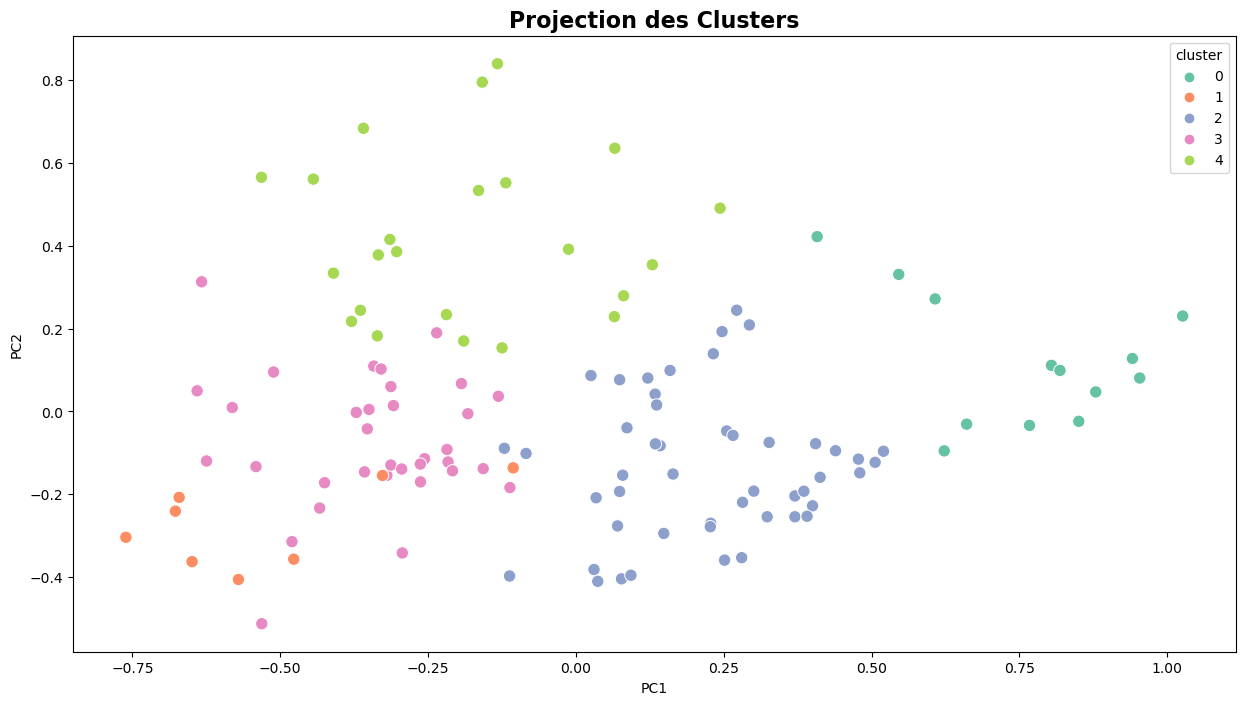

In [11]:
# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(donnees2_numeric.drop(columns=["cluster"]))
# Créer un DataFrame avec les 2 premières composantes principales et la colonne des clusters
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["cluster"] = donnees2_numeric["cluster"]
# Afficher le graphique
plt.figure(figsize=(15, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set2", s=80)
plt.title("Projection des Clusters", fontsize=16, fontweight='bold')
plt.show()

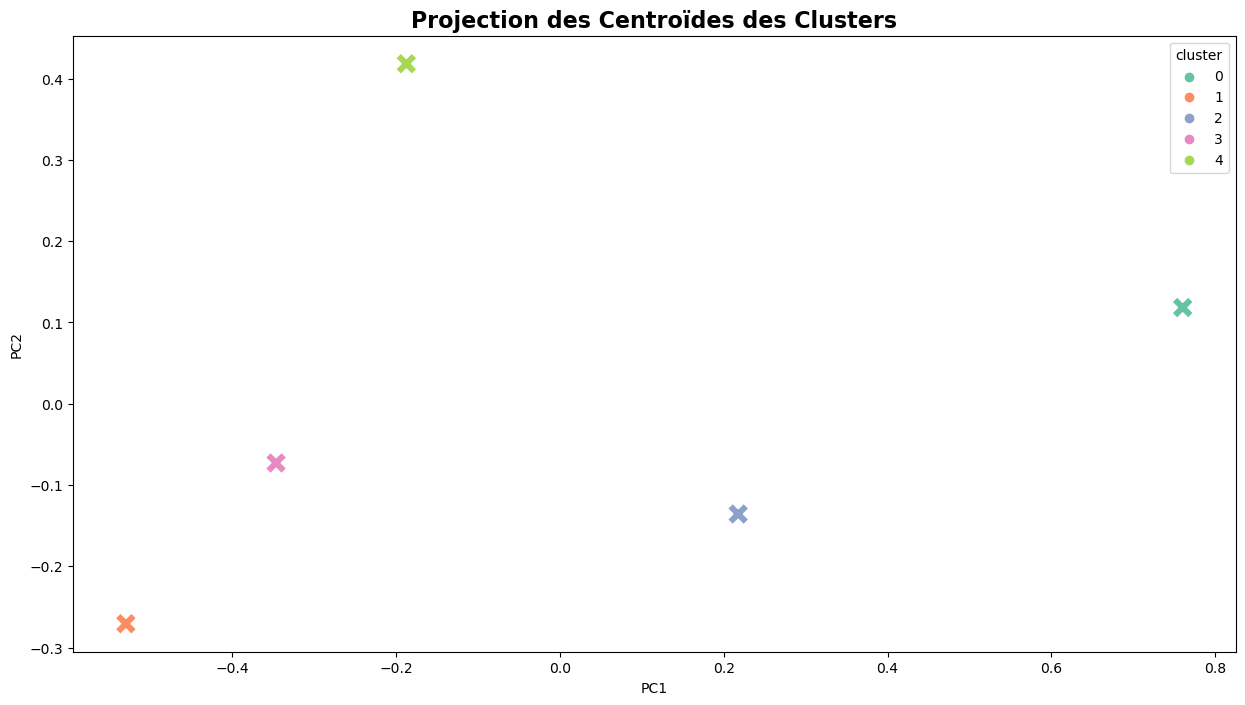

In [12]:
# Calculer les centroïdes (moyennes des points dans chaque cluster)
centroids = pca_df.groupby("cluster")[["PC1", "PC2"]].mean()
# Tracer un scatter plot des centroïdes uniquement
plt.figure(figsize=(15, 8))
sns.scatterplot(data=centroids, x="PC1", y="PC2", hue=centroids.index, palette="Set2", s=250, marker="X")
plt.title("Projection des Centroïdes des Clusters", fontsize=16, fontweight='bold')
plt.show()

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.3 - Analyse des clusters</h3>
</div>

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="2-3-1" style="margin: auto; padding: 20px; color: RGB(255,220,100);">2.3.1 - Centroïdes</h3>
</div>

In [13]:
# Compter le nombre d'observations dans chaque cluster
cluster_counts = donnees2_numeric["cluster"].value_counts().sort_values(ascending=False)
# Créer un mapping {ancien_cluster: nouveau_cluster}
cluster_mapping = {old: new for new, old in enumerate(cluster_counts.index)}
# Appliquer la nouvelle numérotation
donnees2_numeric["cluster"] = donnees2_numeric["cluster"].map(cluster_mapping)
# Vérifier que les clusters sont bien renommés
print(donnees2_numeric["cluster"].value_counts().sort_index())  

cluster
0    48
1    34
2    23
3    13
4     8
Name: count, dtype: int64


In [14]:
# Analyser les moyennes des variables par cluster
cluster_means = donnees2_numeric.groupby("cluster").mean()
cluster_means.round(2)

,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite
cluster,,,,,,,,
0,0.06,0.04,0.19,0.12,0.08,-0.08,0.66,0.34
1,0.01,0.38,0.35,0.33,0.16,0.27,0.87,0.48
2,0.04,0.14,0.62,0.65,0.06,-0.04,0.71,0.37
3,0.04,0.02,0.13,0.11,0.04,-0.74,0.56,0.39
4,0.00,0.30,0.81,0.09,0.72,0.24,0.78,0.20


## Cluster 0
- Population : **MAX**
- PIB/Hab : Faible
- Disponibilité/Hab : Faible
- Production/Hab : Faible
- Importation/Hab : Faible
- Stabilité_politique : Moyen
- Perf_logistique : Moyen
- Fiscalite : Moyen

## Cluster 1
- Population : Faible
- PIB/Hab : **MAX**
- Disponibilité/Hab : Moyen
- Production/Hab : Moyen
- Importation/Hab : Faible
- Stabilité_politique : **MAX**
- Perf_logistique : **MAX**
- Fiscalite : **MAX**

## Cluster 2
- Population : Moyen
- PIB/Hab : Moyen
- Disponibilité/Hab : Elevé
- Production/Hab : **MAX**
- Importation/Hab : Faible
- Stabilité_politique : Moyen
- Perf_logistique : Moyen
- Fiscalite : Moyen

## Cluster 3
- Population : Moyen
- PIB/Hab : **MIN**
- Disponibilité/Hab : **MIN**
- Production/Hab : Faible
- Importation/Hab : Faible
- Stabilité_politique : **MIN**
- Perf_logistique : **MIN**
- Fiscalite : Moyen

## Cluster 4
- Population : **MIN**
- PIB/Hab : Elevé
- Disponibilité/Hab : **MAX**
- Production/Hab : **MIN**
- Importation/Hab : **MAX**
- Stabilité_politique : Elevé
- Perf_logistique : Elevé
- Fiscalite : **MIN**

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="2-3-2" style="margin: auto; padding: 20px; color: RGB(255,220,100);">2.3.2 - Visualisations</h3>
</div>

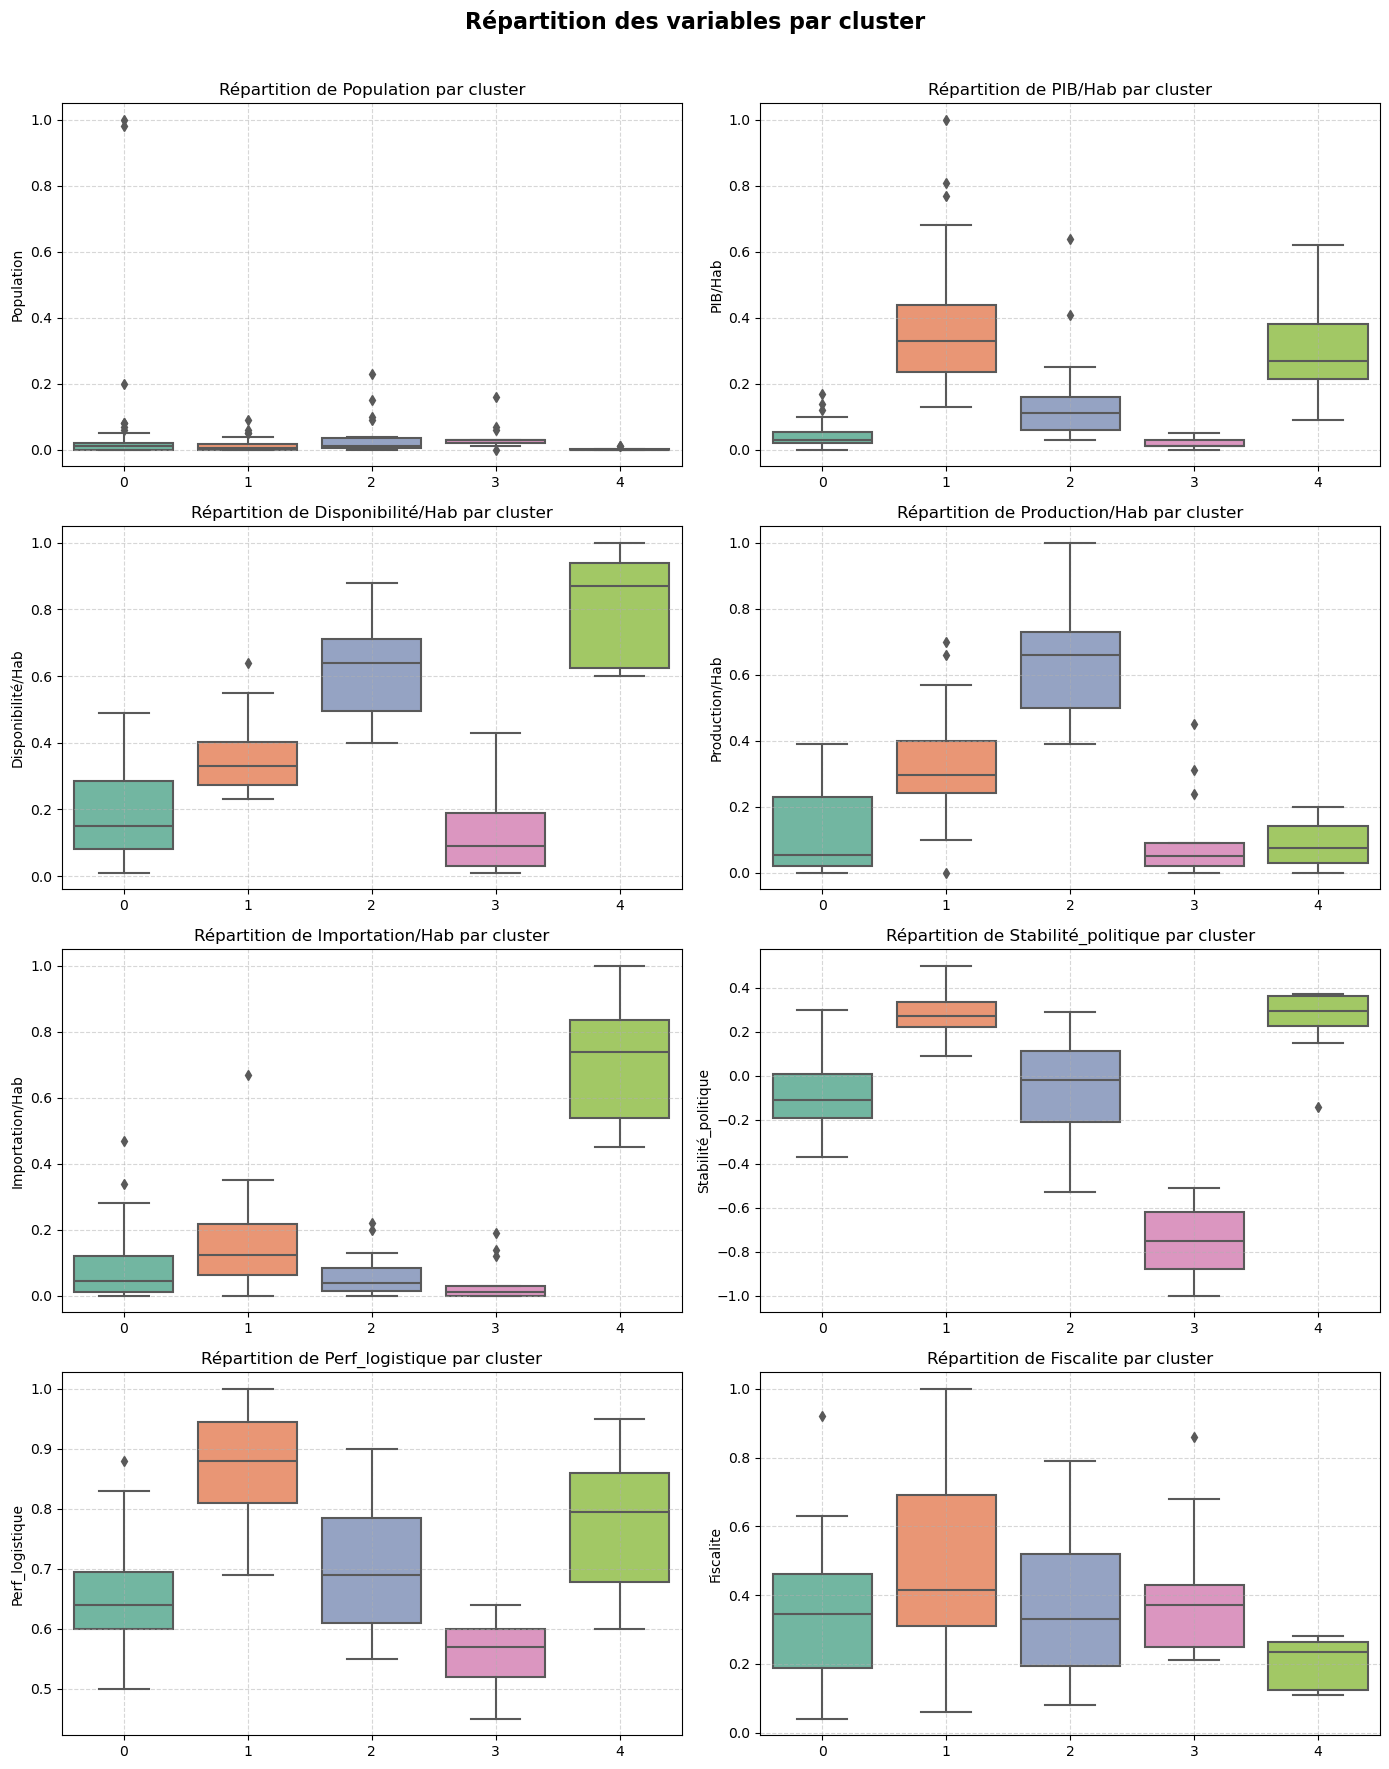

In [15]:
# Avec Boxplot

# Liste des colonnes à afficher
colonnes = [
    "Population", "PIB/Hab", "Disponibilité/Hab", "Production/Hab",
    "Importation/Hab", "Stabilité_politique", "Perf_logistique", "Fiscalite"
]
# Création d'une figure avec 8 sous-graphiques
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
fig.suptitle("Répartition des variables par cluster", fontsize=16, fontweight='bold')
# Boucle pour tracer chaque boxplot
for ax, col in zip(axes.flatten(), colonnes):
    sns.boxplot(data=donnees2_numeric, x='cluster', y=col, palette="Set2", ax=ax)
    ax.set_title(f"Répartition de {col} par cluster", fontsize=12)
    ax.set_xlabel("")
    ax.grid(True, linestyle="--", alpha=0.5)
# Ajuster l'affichage pour une meilleure lisibilité
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the

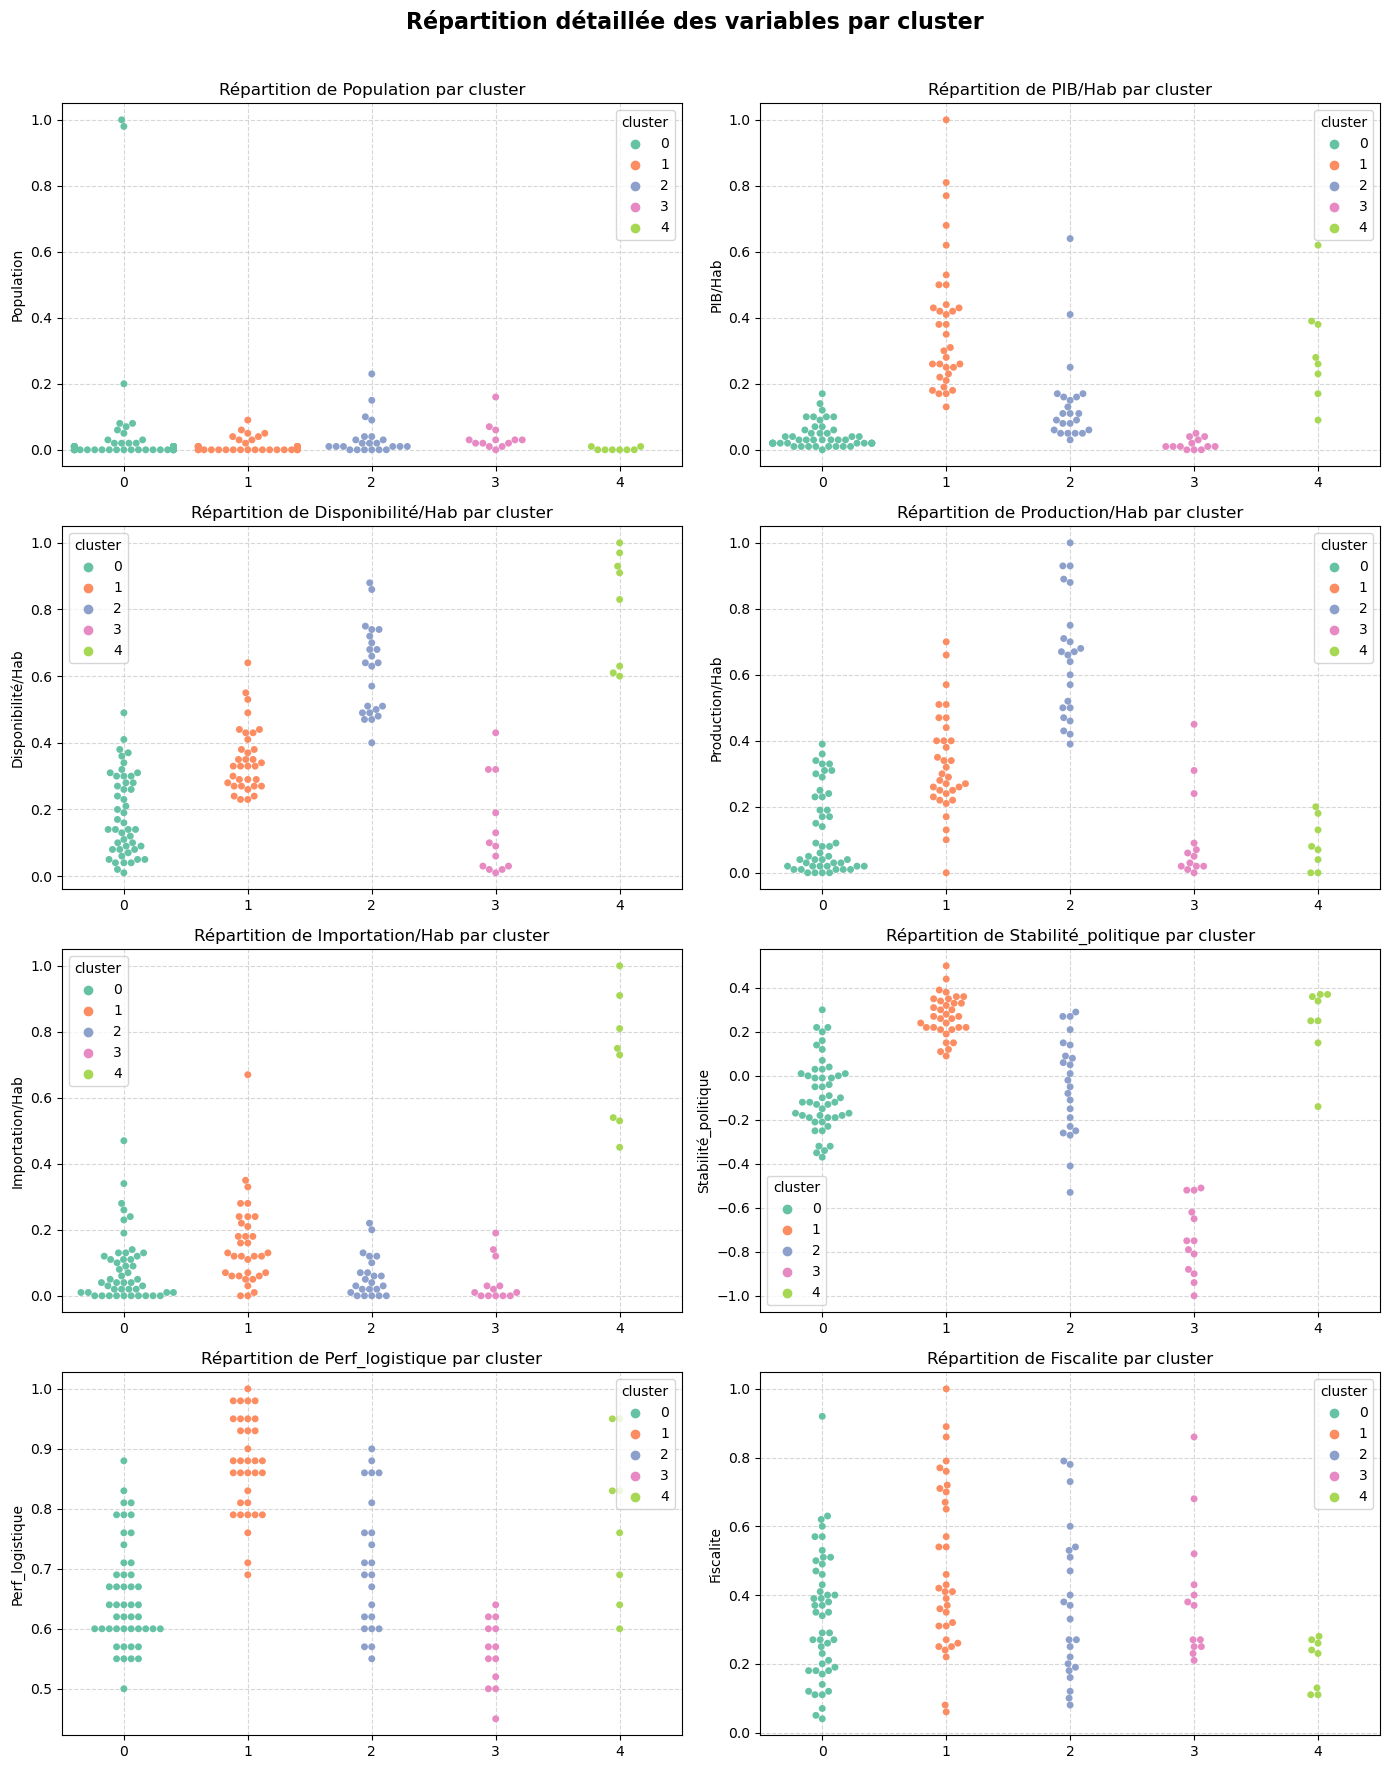

In [16]:
# Avec Violin Plot

# Liste des colonnes à afficher
colonnes = [
    "Population", "PIB/Hab", "Disponibilité/Hab", "Production/Hab",
    "Importation/Hab", "Stabilité_politique", "Perf_logistique", "Fiscalite"
]
# Création d'une figure avec 8 sous-graphiques
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18)) 
fig.suptitle("Répartition détaillée des variables par cluster", fontsize=16, fontweight='bold')
# Boucle pour tracer chaque violin plot
for ax, col in zip(axes.flatten(), colonnes):
    sns.swarmplot(data=donnees2_numeric, x='cluster', y=col, hue='cluster', palette="Set2", ax=ax)
    ax.set_title(f"Répartition de {col} par cluster", fontsize=12)
    ax.set_xlabel("") 
    ax.grid(True, linestyle="--", alpha=0.5)
# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

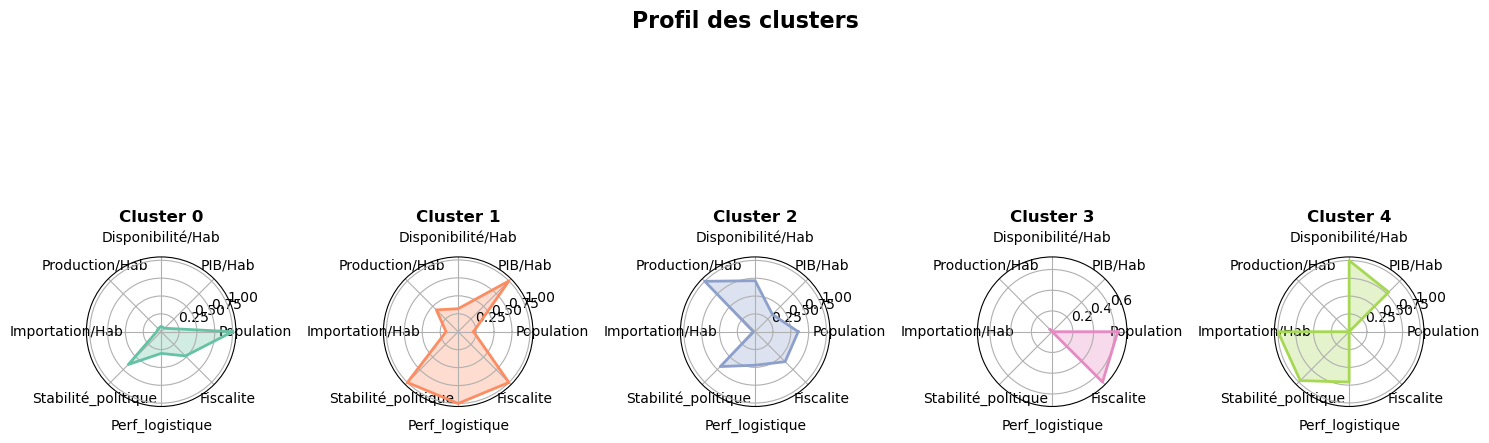

In [17]:
# Avec un Radar Chart par cluster

# Calculer la moyenne de chaque variable par cluster
cluster_means = donnees2_numeric.groupby("cluster").mean()
# Normaliser les données pour que toutes les variables soient comparables (optionnel)
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
                                    columns=cluster_means.columns, 
                                    index=cluster_means.index)
# Définir les variables et les clusters
categories = cluster_means.columns
num_vars = len(categories)
clusters = cluster_means.index  
# Palette de couleurs "Set2"
set2_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]
# Création du graphique radar
fig, axes = plt.subplots(1, len(clusters), figsize=(15, 6), subplot_kw=dict(polar=True))
fig.suptitle("Profil des clusters", fontsize=16, fontweight='bold')
for i, cluster in enumerate(clusters):
    values = cluster_means_scaled.loc[cluster].values  
    values = np.concatenate((values, [values[0]])) 
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    ax = axes[i] if len(clusters) > 1 else axes  
    color = set2_colors[i % len(set2_colors)]  
    ax.fill(angles, values, alpha=0.3, label=f'Cluster {cluster}', color=color)  
    ax.plot(angles, values, linewidth=2, color=color)  
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f'Cluster {cluster}', fontsize=12, fontweight='bold')
    ax.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [18]:
# Avec un Radar Chart

# Calculer la moyenne de chaque variable par cluster
cluster_means = donnees2_numeric.groupby("cluster").mean()
# Normaliser les données pour éviter qu'une variable domine les autres
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
                                    columns=cluster_means.columns, 
                                    index=cluster_means.index)
# Transposer les données pour correspondre au format Plotly
df_radar_T = cluster_means_scaled.T
theta = df_radar_T.index 
# Palette de couleurs "Set2" de Seaborn
set2_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"] 
# Création du radar chart avec Plotly
fig = go.Figure()
# Ajouter chaque cluster au graphique radar
for i, cluster in enumerate(df_radar_T.columns):
    fig.add_trace(go.Scatterpolar(
        r=df_radar_T[cluster],  
        theta=theta,
        fill='toself',
        name=f'Cluster {cluster}',
        line=dict(color=set2_colors[i % len(set2_colors)])
    ))
# Mise en forme du graphique (agrandissement)
fig.update_layout(
    title={
        'text': "<b>Profil des clusters</b>",  # Titre en gras
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=650, 
    height=500,  
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.00,
        xanchor="left",
        x=0.03,
        orientation="h"
    )
)
fig.show()


<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-4" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.4 - Conclusions</h3>
</div>

#### **Les pays du cluster 0** sont des pays assez peuplés dont **tous les indicateurs sont faibles à moyen**.


#### **Les pays du cluster 1** sont les pays les **plus riches** où il n'y a pas de mauvais indicateur (**meilleurs PIB/Hab, Stabilité_politique, Perf_logistiques et plus haute Fiscalité**). 

#### **Les pays du cluster 2** sont des pays qui **produisent le plus et la Disponibilité/Hab est élevée**. Par contre, l'autres indicateurs sont moyens.

#### **Les pays du cluster 3** sont les pays les plus pauvres où **tous les indicateurs sont très faibles** (pires PIB/Hab, Disponibilité/Hab, Stabilité_politique et Perf_logistiques).

#### **Les pays du cluster 4** sont de petits **pays riches où la Disponibilité/Hab est la meilleure**. Il ne produisent pas mais importent beaucoup. Leur fiscalité est la plus avantageuse. Ils sont peu peuplés.

In [19]:
# Afficher les pays pour chaque cluster
# # Ajouter la colonne "Pays" au DataFrame PCA
pca_df["Pays"] = donnees2["Pays"]
# Obtenir la liste des clusters triés du plus grand au plus petit
clusters_tries = pca_df["cluster"].value_counts().sort_values(ascending=False).index
# Afficher les pays pour chaque cluster dans le bon ordre
for i, cluster in enumerate(clusters_tries):  
    print(f'Le cluster {i} est composé de {pca_df.loc[pca_df["cluster"] == cluster].shape[0]} pays:')
    print(pca_df.loc[pca_df["cluster"] == cluster]["Pays"].values)
    print("-" * 40)

Le cluster 0 est composé de 48 pays:
['Albanie' 'Algérie' 'Angola' 'Bosnie-Herzégovine' 'Bulgarie' 'Bénin'
 'Cambodge' 'Chine' 'Congo, République du' 'Djibouti' 'El Salvador'
 'Gabon' 'Gambie' 'Ghana' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Honduras'
 'Inde' 'Indonésie' 'Kazakhstan' 'République kirghize' 'Libéria'
 'Madagascar' 'Mauritanie' 'Mongolie' 'Monténégro' 'Namibie' 'Nicaragua'
 'Oman' 'Ouzbékistan' 'Papouasie-Nouvelle-Guinée' 'Paraguay' 'Philippines'
 'Roumanie' 'Rwanda' 'Moldova' 'République démocratique populaire lao'
 'Serbie' 'Sri Lanka' 'Tadjikistan' 'Thaïlande' 'Togo' 'Turquie'
 'Viet Nam' 'Zimbabwe' 'Égypte, République arabe d’' 'Îles Salomon']
----------------------------------------
Le cluster 1 est composé de 34 pays:
['Allemagne' 'Australie' 'Autriche' 'Belgique' 'Canada' 'Chypre'
 'Costa Rica' 'Croatie' 'Danemark' 'Espagne' 'Estonie' 'Finlande' 'France'
 'Grèce' 'Irlande' 'Islande' 'Italie' 'Japon' 'Lettonie' 'Lituanie'
 'Luxembourg' 'Malte' 'Norvège' 'Nouvelle-Zélan

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-3" style="margin: auto; padding: 20px; ">Etape 3 - Classification Ascendante Hiérarchique (CAH)</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1 - Définition et conditions d'utilisation</h3>
</div>

#### La **Classification Ascendante Hiérarchique (CAH)** est une **méthode de classification** qui organise les individus d’un jeu de données en groupes (clusters) de manière hiérarchique. Contrairement au K-Means, elle ne nécessite pas de spécifier un nombre de clusters au départ.

#### **Quand l'utiliser ?**
#### - Lorsque que l'on veut une **visualisation hiérarchique** des groupes.
#### - Losque que l'on travaille avec un **petit jeu de données**.
#### - Lorsque que l'on ne connait pas le nombre de clusters à l'avance.

#### **Principe et fonctionnement** : 
#### 1. Chaque individu commence comme un cluster distinct (on a autant de clusters que d’individus).
#### 2.	À chaque itération, les clusters les plus proches sont fusionnés en fonction d’une métrique de distance.
#### 3.	Ce processus continue jusqu’à ce qu’il ne reste plus qu’un seul cluster contenant tous les individus.
#### 4.	On obtient un dendrogramme (arbre hiérarchique) permettant de visualiser les relations entre les groupes.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2 - Mise en place</h3>
</div>

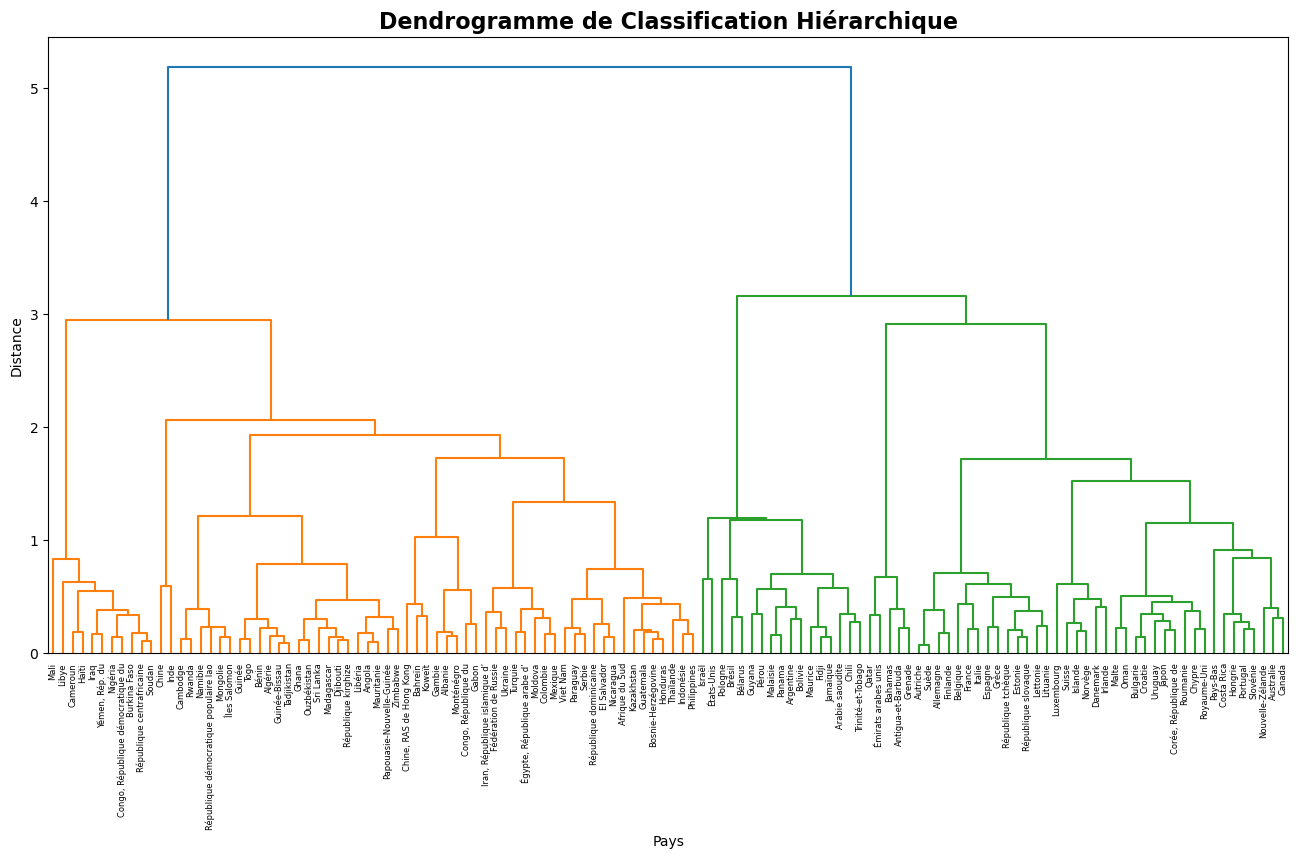

In [20]:
# Création du dendrogramme
cah = donnees2_numeric2
cah = pd.DataFrame(cah)
Z = linkage(cah, method="ward")
noms = donnees2.Pays.values
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
_ = dendrogram(Z, ax=ax, labels=noms)
plt.title("Dendrogramme de Classification Hiérarchique", fontsize=16, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("Distance")
ax.tick_params(axis='x', which='major', labelsize=6)
plt.show()

In [21]:
# Extraction du N° de cluster
cluster_cah = fcluster(Z, 5, criterion='maxclust')
# Ajout de la colonne avec le n° de clusters issu du CAH
donnees2_numeric['cluster_cah']=cluster_cah
donnees2_numeric

,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite,cluster,cluster_cah
0,0.04,0.05,0.50,0.42,0.06,-0.25,0.88,0.08,2,2
1,0.00,0.07,0.31,0.09,0.23,0.07,0.60,0.38,0,2
2,0.03,0.04,0.08,0.08,0.00,-0.21,0.60,0.62,0,2
3,0.06,0.42,0.23,0.24,0.13,0.22,0.98,0.43,1,5
4,0.03,0.02,0.14,0.02,0.11,-0.12,0.50,0.18,0,2
...,...,...,...,...,...,...,...,...,...,...
121,0.01,0.02,0.10,0.09,0.00,-0.34,0.60,0.11,0,2
122,0.08,0.03,0.31,0.31,0.00,-0.32,0.74,0.51,0,2
123,0.01,0.38,0.97,0.07,0.81,0.25,0.95,0.28,4,4
124,0.23,0.64,0.72,0.88,0.01,0.01,0.90,0.20,2,3


In [22]:
# Afficher les pays pour chaque cluster

# Création d'une copie du DataFrame avec la colonne 'Pays'
cah_df = donnees2_numeric.copy()
cah_df["Pays"] = donnees2["Pays"]
# Compter le nombre d'observations par cluster
cluster_counts2 = cah_df["cluster_cah"].value_counts().sort_values(ascending=False)
# Créer un dictionnaire de mapping {ancien_numéro: nouveau_numéro}
cluster_mapping2 = {old: new for new, old in enumerate(cluster_counts2.index)}
# Appliquer la nouvelle numérotation aux données
cah_df["cluster_cah"] = cah_df["cluster_cah"].map(cluster_mapping2)
# Boucle pour afficher les nouveaux clusters triés du plus gros au plus petit
for cluster_cah in range(5):  
    print(f'Le cluster {cluster_cah} est composé de {cah_df.loc[cah_df["cluster_cah"] == cluster_cah].shape[0]} pays:')
    print(cah_df.loc[cah_df["cluster_cah"] == cluster_cah]["Pays"].values)
    print("-" * 40)

Le cluster 0 est composé de 55 pays:
['Afrique du Sud' 'Albanie' 'Algérie' 'Angola' 'Bahreïn'
 'Bosnie-Herzégovine' 'Bénin' 'Cambodge' 'Chine' 'Chine, RAS de Hong Kong'
 'Colombie' 'Congo, République du' 'Djibouti' 'El Salvador'
 'Fédération de Russie' 'Gabon' 'Gambie' 'Ghana' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Honduras' 'Inde' 'Indonésie'
 'Iran, République islamique d’' 'Kazakhstan' 'République kirghize'
 'Koweït' 'Libéria' 'Madagascar' 'Mauritanie' 'Mexique' 'Mongolie'
 'Monténégro' 'Namibie' 'Nicaragua' 'Ouzbékistan'
 'Papouasie-Nouvelle-Guinée' 'Paraguay' 'Philippines' 'Rwanda' 'Moldova'
 'République dominicaine' 'République démocratique populaire lao' 'Serbie'
 'Sri Lanka' 'Tadjikistan' 'Thaïlande' 'Togo' 'Turquie' 'Ukraine'
 'Viet Nam' 'Zimbabwe' 'Égypte, République arabe d’' 'Îles Salomon']
----------------------------------------
Le cluster 1 est composé de 38 pays:
['Allemagne' 'Australie' 'Autriche' 'Belgique' 'Bulgarie' 'Canada'
 'Chypre' 'Costa Rica' 'Croatie' 'Danemar

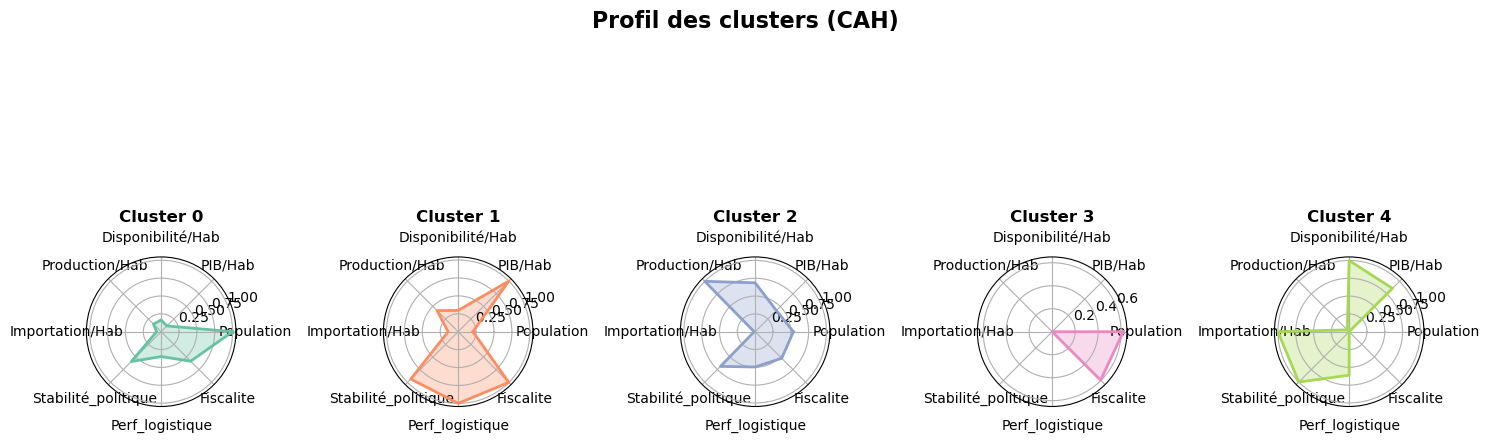

In [23]:
# Calculer la moyenne de chaque variable par cluster pour CAH
# Exclure les colonnes non numériques avant de calculer la moyenne
numeric_columns = cah_df.select_dtypes(include=[np.number]).columns
cluster_means_cah = cah_df.groupby("cluster_cah")[numeric_columns].mean()
# Exclure les colonnes "cluster_cah" et "cluster" du radar chart
cluster_means_cah = cluster_means_cah.drop(columns=["cluster_cah", "cluster"])
# Normaliser les données pour que toutes les variables soient comparables (optionnel)
scaler = MinMaxScaler()
cluster_means_scaled_cah = pd.DataFrame(scaler.fit_transform(cluster_means_cah), 
                                        columns=cluster_means_cah.columns, 
                                        index=cluster_means_cah.index)
# Définir les variables et les clusters
categories = cluster_means_cah.columns
num_vars = len(categories)
clusters_cah = cluster_means_cah.index  
# Palette de couleurs "Set2"
set2_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]
# Création du graphique radar
fig, axes = plt.subplots(1, len(clusters_cah), figsize=(15, 6), subplot_kw=dict(polar=True))
fig.suptitle("Profil des clusters (CAH)", fontsize=16, fontweight='bold')
for i, cluster in enumerate(clusters_cah):
    values = cluster_means_scaled_cah.loc[cluster].values  
    values = np.concatenate((values, [values[0]])) 
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    ax = axes[i] if len(clusters_cah) > 1 else axes  
    color = set2_colors[i % len(set2_colors)]  
    ax.fill(angles, values, alpha=0.3, label=f'Cluster {cluster}', color=color)  
    ax.plot(angles, values, linewidth=2, color=color)  
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f'Cluster {cluster}', fontsize=12, fontweight='bold')
    ax.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.3 - Conclusions</h3>
</div>

##### **Avec la Classification Ascendante Hierarchique, les clusters sont quasiment identiques à ceux du k-means**. Ici, il y a plus de pays dans le cluster 0. Ces pays là sont mieux répartis dans les autres clusters du k-means.

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-4" style="margin: auto; padding: 20px; ">Etape 4 - Analyse en Composantes Principales (ACP)</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.1 - Définition et conditions d'utilisation</h3>
</div>

##### L’**Analyse en Composantes Principales (ACP)** est une **méthode de réduction de la dimensionnalité des données**. Elle permet de transformer un ensemble de variables observées en un ensemble de nouvelles variables, appelées composantes principales, tout en conservant autant que possible l’information présente dans les données originales. Ces nouvelles variables sont ordonnées par ordre d’importance, c’est-à-dire que la première composante principale est celle qui explique le plus de variance dans les données, la deuxième en explique le plus possible en restant orthogonale à la première, et ainsi de suite.
##### **L'ACP permet d'étudier** :
##### - **la variabilité entre les individus**, c'est-à-dire quelles sont les différences et les ressemblances entre individus.
##### - **les liaisons entre les variables** : y a-t-il des groupes de variables très corrélées entre elles, qui peuvent être regroupées en de nouvelles variables synthétiques ?


##### **Quand l'utiliser ?** :
#####	1.	**Données numériques et linéaires**
#####	**L’ACP nécessite que les données soient numériques**. Les variables qualitatives doivent être transformées en variables numériques avant l’application de l’ACP.
#####	**L’ACP repose sur l’hypothèse que les relations entre les variables sont linéaires**. Si les relations sont non linéaires, l’ACP peut ne pas être la méthode la plus appropriée.
#####	2.	**Normalisation des données**
#####	Les **variables doivent être normalisées** si elles ont des unités différentes (par exemple, des valeurs dans des échelles comme les kilos et les mètres). Sinon, les variables ayant une plus grande échelle domineront l’ACP, et ce ne sera pas représentatif de la structure des données. Si les échelles sont très différentes, il est important de centrer et réduire les données (soustraction de la moyenne et division par l’écart-type) avant l’ACP.
#####	3.	**Indépendance des variables**
#####	**L’ACP suppose que les variables sont linéairement indépendantes ou peu corrélées**. Si les variables sont fortement corrélées, l’ACP permet de réduire la colinéarité en projetant les données sur des composantes principales.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.2 - Mise en place</h3>
</div>

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="4-2-1" style="margin: auto; padding: 20px; color: RGB(255,220,100);">4.2.1 - Variation expliquée et tracé d'éboulis</h3>
</div>

Nous allons commencer par l’analyse de la variance expliquée et le tracé de l’éboulis des valeurs propres pour plusieurs raisons : 
- Déterminer le nombre optimal de composantes à retenir,
- S’assurer que l’ACP est pertinente,
- Éviter la surinterprétation et la perte d’information.

In [24]:
# Intéressons nous à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ 
donnees2_numeric = donnees2.drop(columns=["Pays"])
# Appliquer le PCA
pca = PCA()
donnees_pca = pca.fit_transform(donnees2_numeric)
# Obtenir la variance expliquée
variance_expliquee = pca.explained_variance_ratio_
variance_expliquee

array([0.43209034, 0.1947009 , 0.14206092, 0.09732269, 0.06757934,
       0.04057893, 0.01498077, 0.01068611])

Ici la 1ère composante capte 43 % de la variance de nos données initiales, la 2ème 19 %, etc.


In [25]:
# Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.21, 19.47, 14.21,  9.73,  6.76,  4.06,  1.5 ,  1.07])

Les 2 premières composantes captent donc 43 + 19 = 62 % de la variance, les 3 premières 43 + 19 + 14 = 76 % de la variance, etc.

In [26]:
# Créons une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  63.,  77.,  87.,  93.,  97.,  99., 100.])

  Composante  Variance expliquée (%)  Variance cumulée (%)
0          1                   43.21                  43.0
1          2                   19.47                  63.0
2          3                   14.21                  77.0
3          4                    9.73                  87.0
4          5                    6.76                  93.0
5          6                    4.06                  97.0
6          7                    1.50                  99.0
7          8                    1.07                 100.0


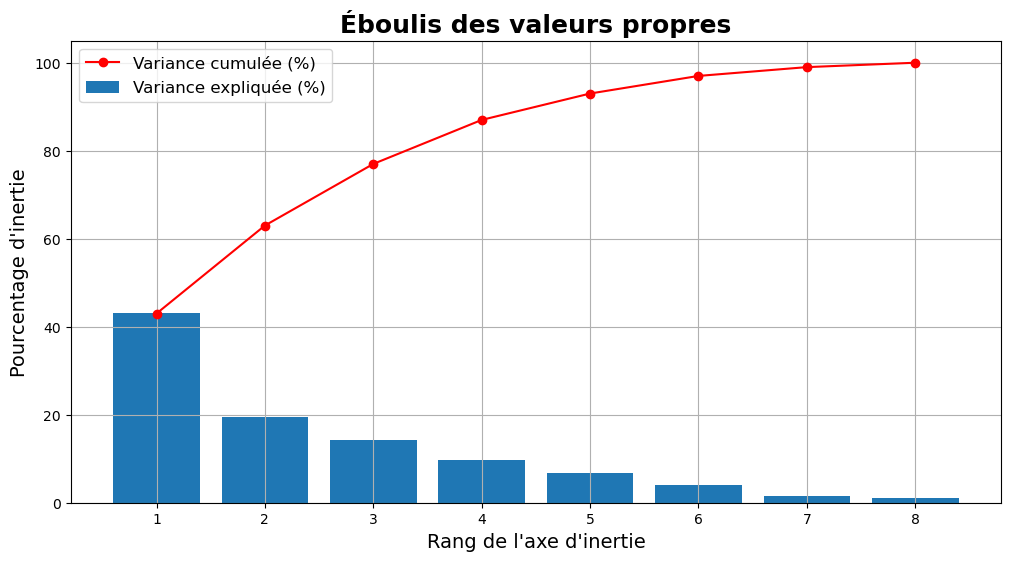

In [27]:
# Définir la liste des composantes
composantes = [f"{i+1}" for i in range(len(scree))]
# Créer un DataFrame pour visualiser la variance expliquée
df_scree = pd.DataFrame({
    "Composante": composantes,
    "Variance expliquée (%)": scree,
    "Variance cumulée (%)": scree_cum
})
print(df_scree)
# Affichage du tableau
plt.figure(figsize=(12,6))
# Créer un graphique
plt.bar(composantes, scree, label="Variance expliquée (%)")
plt.plot(composantes, scree_cum, c="red", marker='o', label="Variance cumulée (%)")
plt.xlabel("Rang de l'axe d'inertie", fontsize=14)  # Légèrement plus grand
plt.ylabel("Pourcentage d'inertie", fontsize=14)  # Légèrement plus grand
plt.title("Éboulis des valeurs propres", fontsize=18, fontweight="bold")  # Plus grand et en gras
plt.legend(fontsize=12)
plt.grid()
# Affichage du graphique
plt.show(block=False)

On voit ici que près de 80 % de la variance est comprise dans les 3 premières composantes, et près de 90 % dans les 4 premières.

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="4-2-2" style="margin: auto; padding: 20px; color: RGB(255,220,100);">4.2.2 - Composantes</h3>
</div>

Intéressons nous maintenant aux composantes. Elles vont nous permettre de comprendre comment les variables initiales sont combinées et d’interpréter les axes factoriels. 
C'est par un calcul que l'on obtient ces composantes.
La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs`.

In [28]:
# Matrice des composantes principales du PCA
pcs = pca.components_
pcs = pd.DataFrame(pcs)
# Attribution des noms de colonnes et d'index aux composantes principales
pcs.columns = donnees2_numeric.columns
pcs.index = [f"F{i}" for i in composantes]
pcs.round(2)

,Population,PIB/Hab,Disponibilité/Hab,Production/Hab,Importation/Hab,Stabilité_politique,Perf_logistique,Fiscalite
F1,0.05,-0.34,-0.41,-0.30,-0.22,-0.72,-0.22,0.03
F2,0.06,-0.07,0.38,0.76,-0.27,-0.40,-0.00,0.20
F3,-0.14,-0.18,0.47,-0.05,0.36,-0.24,-0.24,-0.70
F4,0.07,0.06,0.32,-0.26,0.61,-0.28,0.04,0.61
F5,0.12,0.77,-0.10,-0.03,0.00,-0.41,0.38,-0.27
F6,0.95,-0.22,0.09,-0.06,0.01,0.08,0.15,-0.14
F7,-0.16,-0.41,-0.36,0.30,0.41,-0.07,0.64,-0.11
F8,0.20,0.21,-0.46,0.42,0.45,0.03,-0.56,-0.02


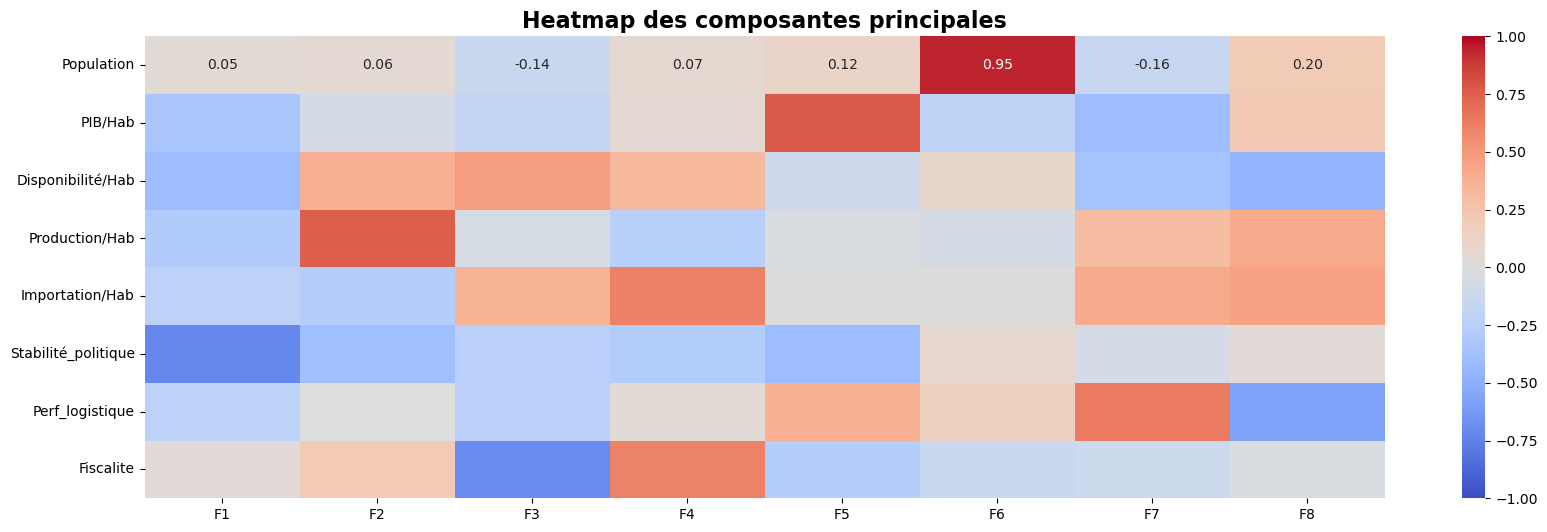

In [29]:
# Créer une représentation visuelle
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap des composantes principales", fontsize=16, fontweight="bold")
plt.show()

##### La Population a une forte contribution à F6 (0.95), ce qui signifie que cette composante est fortement influencée par cette variable.
##### Le PIB/Hab a une contribution importante sur F5.
##### La Disponibilité/Hab influence davantage F2,F3 et F4.
##### La Production/Hab a une contribution importante sur F2.
##### L'Importation/Hab influence davantage F3 et F4.
##### La Stabilité politique impacte négativement F1.
##### La Performance logistique est corrélée positivement à F5 et F7.
##### La Fiscalité joue un rôle clé sur F4 positivement, et sur F3 négativement.

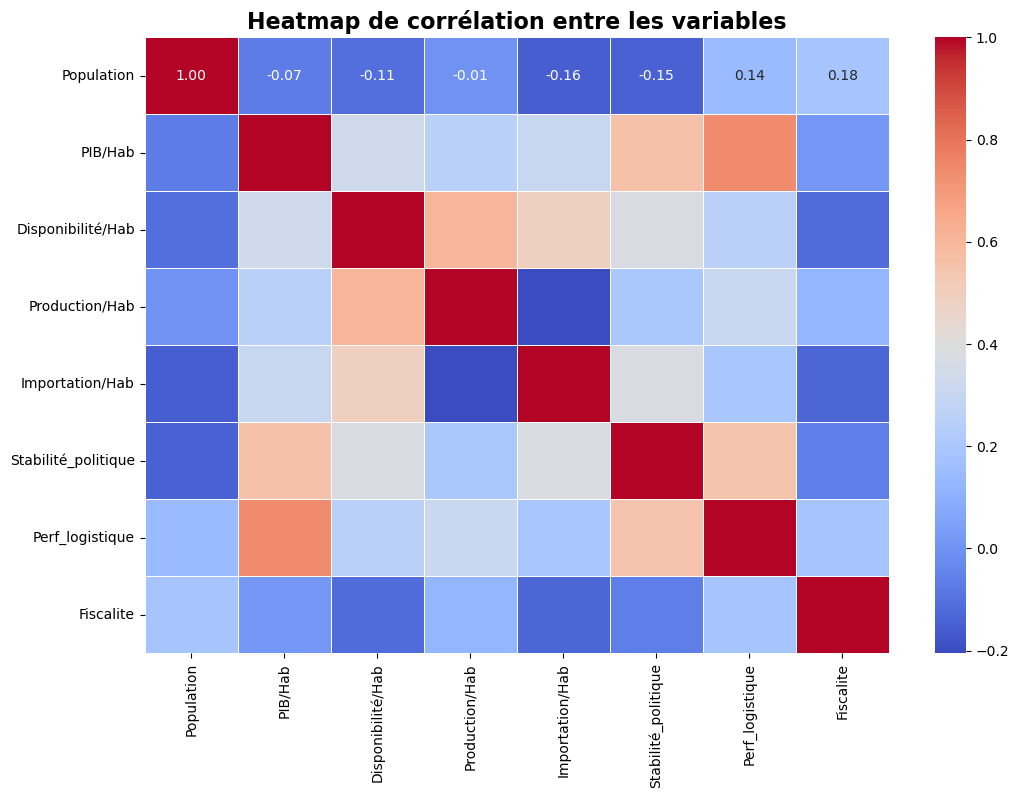

In [ ]:
# Observer la corrélation entre les variables
# Calculer la matrice de corrélation
correlation_matrice = donnees2_numeric.corr()
# Créer une heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrice, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de corrélation entre les variables", fontsize=16, fontweight="bold")
plt.show()

<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="4-2-3" style="margin: auto; padding: 20px; color: RGB(255,220,100);">4.2.3 - Cercles des corrélations</h3>
</div>

Le cercle des corrélations permet de visualiser la contribution des variables initiales aux composantes principales. Il est essentiel pour interpréter les axes factoriels et mieux comprendre les relations entre les variables.

In [31]:
# Créer la fonction pour afficher les graphiques
pcs_colonnes = pcs.columns
def plot_cercle_correlation(pca, pcs_colonnes, comp_x=0, comp_y=1):
    """
    Affiche le cercle des corrélations pour les composantes principales choisies.
    Paramètres :
    - pca : objet PCA de sklearn après ajustement des données
    - pcs_colonnes : liste des noms des variables initiales
    - comp_x : index de la première composante principale (ex : 0 pour F1)
    - comp_y : index de la deuxième composante principale (ex : 1 pour F2)
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(pca.components_.shape[1]):
        ax.arrow(0, 0,  
                 pca.components_[comp_x, i],  # Projection sur la composante X
                 pca.components_[comp_y, i],  # Projection sur la composante Y
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02)
        plt.text(pca.components_[comp_x, i] + 0.05, 
                 pca.components_[comp_y, i] + 0.05, 
                 pcs_colonnes[i])  
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlabel('F{} ({}%)'.format(comp_x+1, round(100 * pca.explained_variance_ratio_[comp_x], 1)))
    plt.ylabel('F{} ({}%)'.format(comp_y+1, round(100 * pca.explained_variance_ratio_[comp_y], 1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(comp_x+1, comp_y+1), fontsize=16, fontweight="bold")
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an), color='black')
    plt.axis('equal')
    plt.show(block=False)

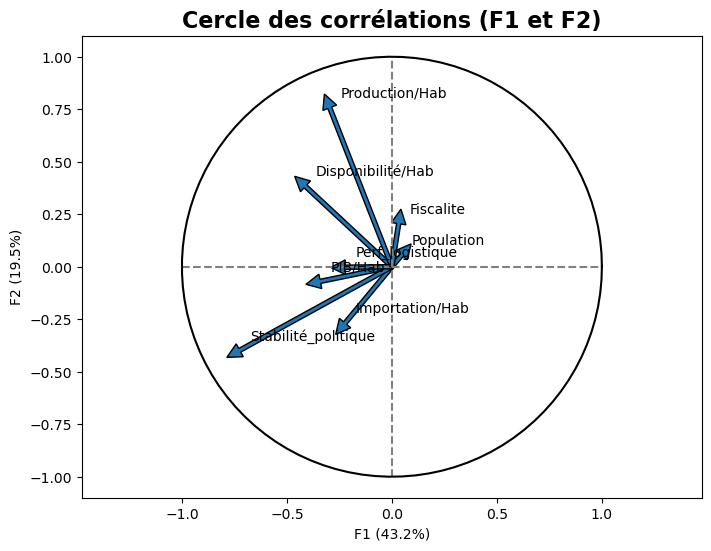

In [32]:
# Affichage du cercle des corrélations pour F1 et F2
plot_cercle_correlation(pca, pcs_colonnes, comp_x=0, comp_y=1)

Les variables sont plutôt corrélées négativement à F1, surtout la Stabilité politique.

Les variables les plus corrélées positivement à F2 sont la Production/Hab et la Disponiblité/Hab, la Stabilité Politique étant corrélée négativement.

Interprétation : 
- F1 pourrait représenter un axe de stabilité

À droite : pays avec une faible stabilité.
À gauche : pays avec une bonne stabilité.

- F2 pourrait représenter un axe de Production/Hab et de Disponibilité/Hab.

En haut : pays avec une forte production et une forte disponibilité.
En bas : pays avec une faible production et une faible disponibilité.

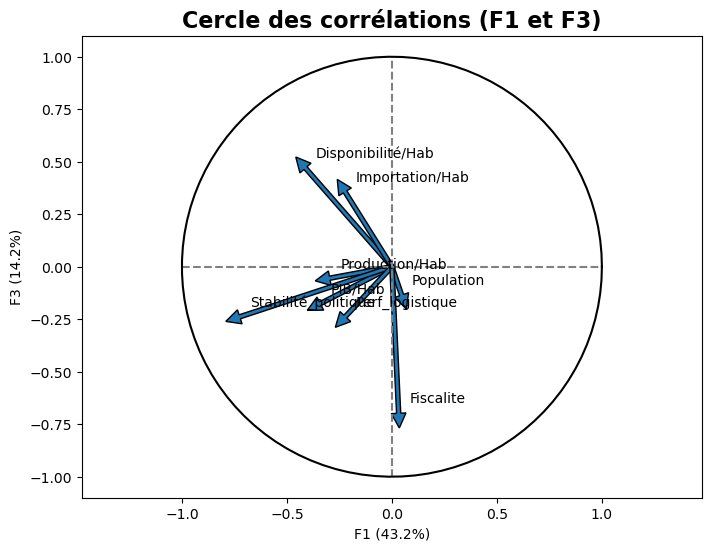

In [33]:
# Affichage du cercle des corrélations pour F1 et F3
plot_cercle_correlation(pca, pcs_colonnes, comp_x=0, comp_y=2)

Les variables sont plutôt corrélées négativement à F1, surtout la Stabilité politique.

Les variables les plus corrélées positivement à F2 sont la Production/Hab et la Disponiblité/Hab, la Fiscalité étant corrélée négativement.

Il semble y avoir une corrélation entre la Production/Hab et la Disponiblité/Hab, et une corrélation entre la Stabilité Politique, la production, le PIB et la performance logistique.

Interprétation : 
- F1 pourrait représenter un axe de stabilité où plus le pays est stable, plus les indicateurs économiques sont bons.

À droite : pays avec une faible stabilité.
À gauche : pays avec une bonne stabilité.

- F3 pourrait représenter un axe de ficalité/richesse.

En haut : pays avec une fiscalité faible, une forte dispinibilité et une forte importation.
En bas : pays avec une fiscalité importante.


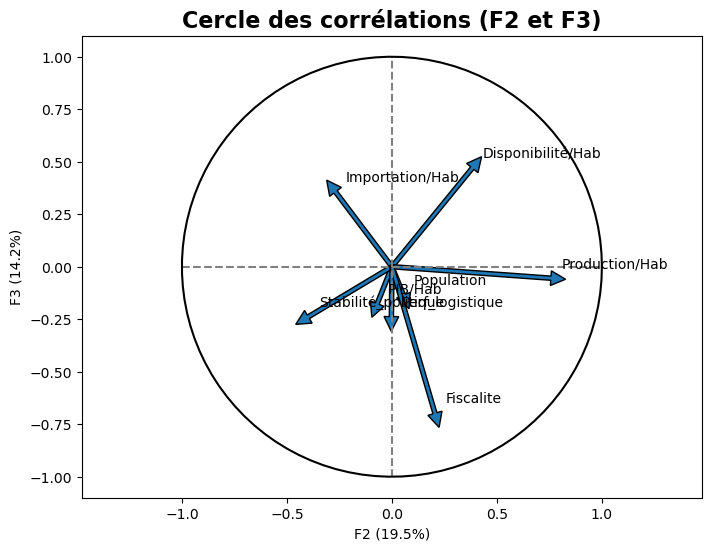

In [34]:
# Affichage du cercle des corrélations pour F2 et F3
plot_cercle_correlation(pca, pcs_colonnes, comp_x=1, comp_y=2)

Interprétation : 
- F2 pourrait représenter un axe d'accès en ressources de volaille (fortes Production/Hab et Disponibilité/Hab), potentiellement des pays producteurs.

À droite : pays avec une forte production et une forte disponibilité.
À gauche : pays avec une faible production et une faible disponibilité.

- F3 pourrait représenter un axe de ficalité/richesse.

En haut : pays avec une fiscalité faible, une forte disponibilité et une forte importation.
En bas : pays avec une fiscalité importante.


<div style="border: 1px solid RGB(255,220,100);" >
  <h3 id="4-2-4" style="margin: auto; padding: 20px; color: RGB(255,220,100);">4.2.4 - Projection des individus</h3>
</div>

La projection des individus permet d’analyser la répartition des observations dans l’espace des nouvelles composantes principales.

Trois raisons principales pour lesquelles elle est essentielle après l’ACP :
- Identifier des groupes et des tendances,
- Interpréter les axes factoriels,
- Détecter des valeurs atypiques (outliers).

In [35]:
# Créer une fonction pour les graphiques avec coloration par cluster
def projection_colorees(X_pca, pca, clusters, x=0, y=1, labels=None, figsize=(17, 9)):
	"""
	Affiche la projection des individus sur le plan factoriel défini par les composantes x et y avec coloration par cluster.
	
	Paramètres :
	- X_pca : array, coordonnées des individus après PCA
	- pca : objet PCA de sklearn, contient les variances expliquées
	- clusters : array, labels des clusters pour chaque individu
	- x, y : indices des composantes principales à afficher (0 pour PC1, 1 pour PC2, etc.)
	- labels : liste des noms des individus (ex: noms des pays), optionnel
	- figsize : taille du graphique, par défaut (17, 9)
	"""
	# Création de la figure
	fig, ax = plt.subplots(figsize=figsize)
	# Affichage des points avec Seaborn
	sns.scatterplot(x=X_pca[:, x], y=X_pca[:, y], hue=clusters, palette="Set2", s=100, ax=ax)
	# Ajout des labels si fournis
	if labels is not None:
		for i, label in enumerate(labels):
			plt.text(X_pca[i, x], X_pca[i, y], label, fontsize=7.5, ha='center')
	# Calcul du pourcentage de variance expliquée
	v1 = f"{round(100 * pca.explained_variance_ratio_[x], 1)}%"
	v2 = f"{round(100 * pca.explained_variance_ratio_[y], 1)}%"
	# Personnalisation des axes
	plt.xlabel(f'F{x+1} ({v1})', fontsize=14)
	plt.ylabel(f'F{y+1} ({v2})', fontsize=14)
	plt.title(f"Projection des individus (F{x+1} et F{y+1})", fontsize=16, fontweight="bold")
	# Ajout des lignes de référence
	plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
	plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
	plt.grid(alpha=0.3)
	plt.legend(title='Cluster')
	plt.show()

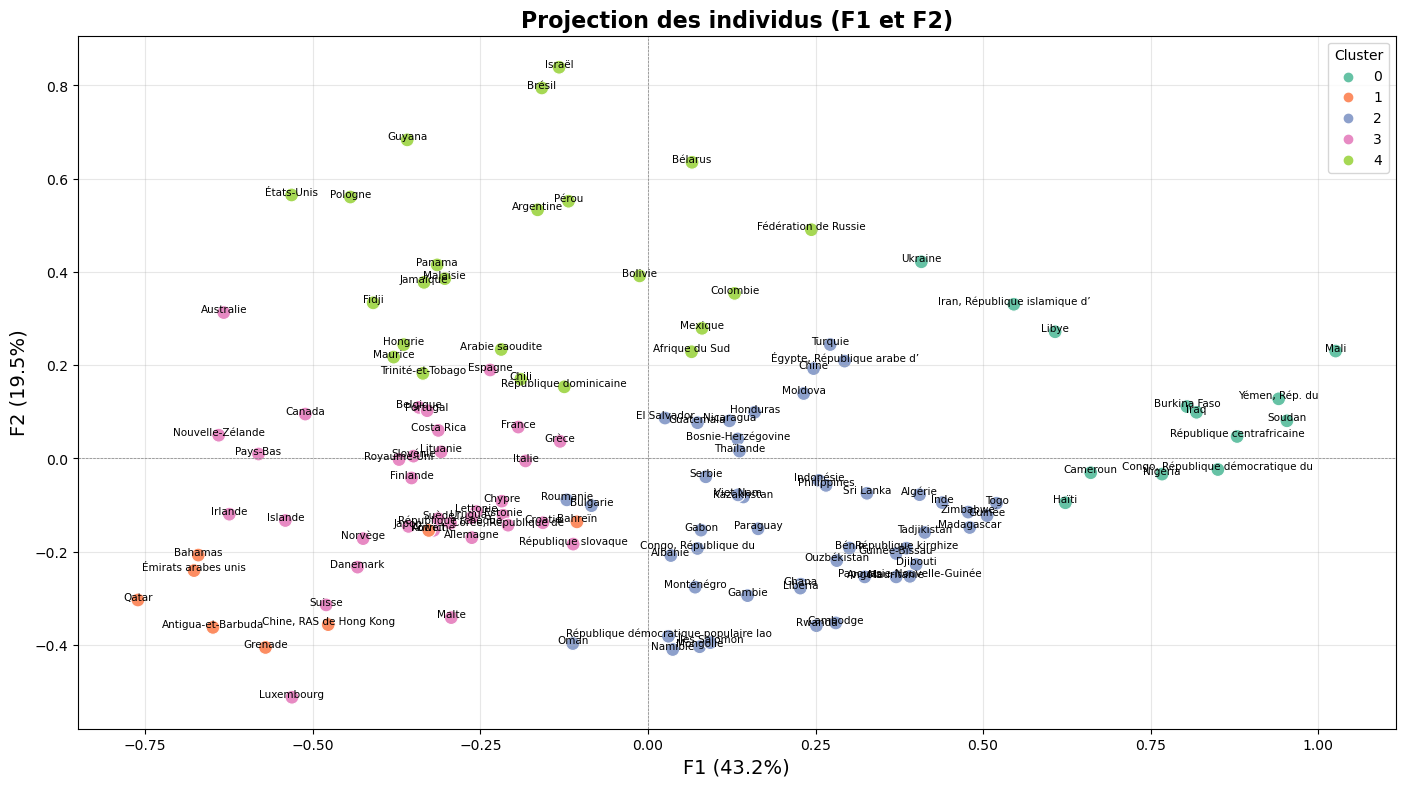

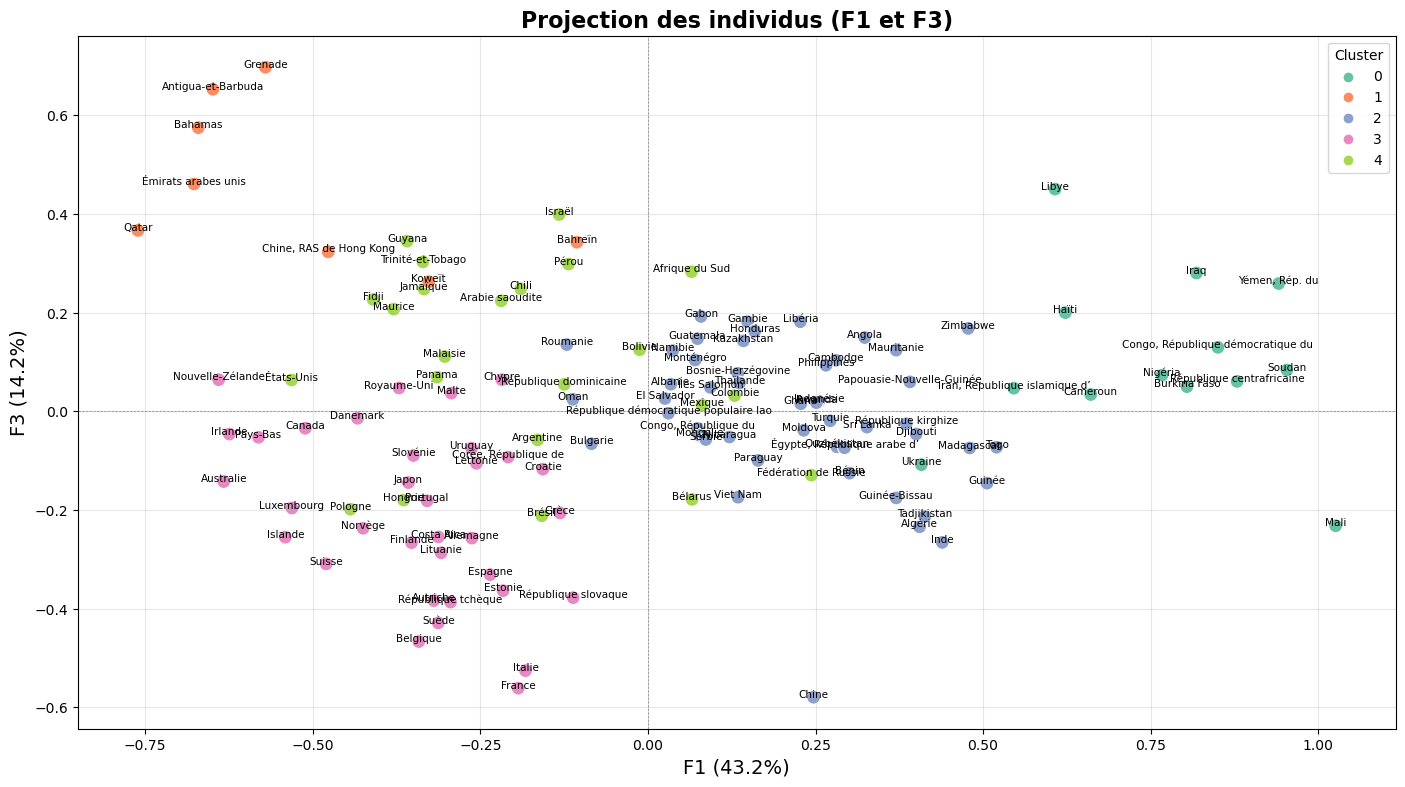

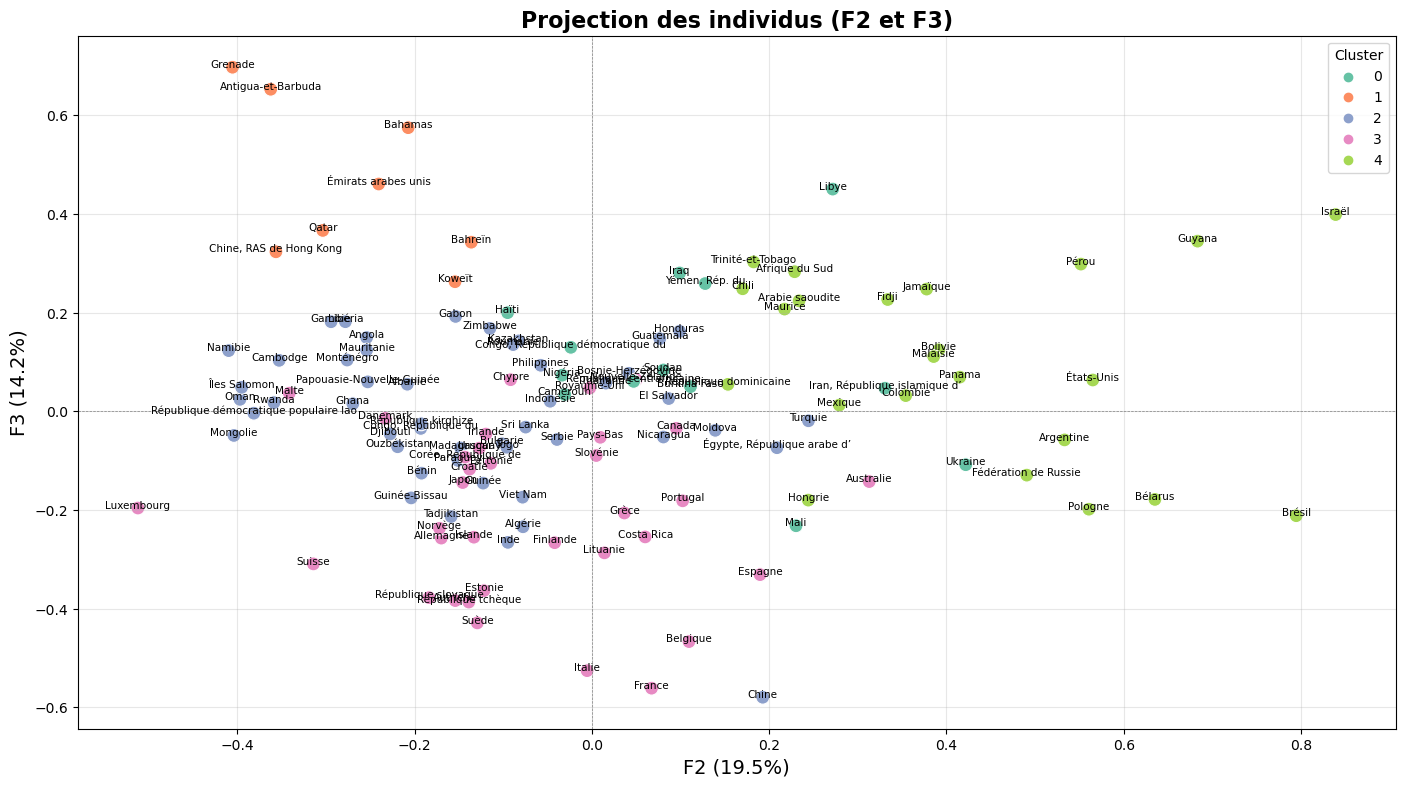

In [36]:
# Ajouter la colonne 'cluster' à donnees2_numeric
donnees2_numeric["cluster"] = kmeans.labels_
# Appliquer la PCA sur les données numériques
X_pca = pca.transform(donnees2_numeric.drop(columns=["cluster"]))
# Afficher la projection sur F1 et F2
projection_colorees(X_pca, pca, donnees2_numeric["cluster"], x=0, y=1, labels=donnees2["Pays"])
# Afficher la projection sur F1 et F3
projection_colorees(X_pca, pca, donnees2_numeric["cluster"], x=0, y=2, labels=donnees2["Pays"])
# Afficher la projection sur F2 et F3
projection_colorees(X_pca, pca, donnees2_numeric["cluster"], x=1, y=2, labels=donnees2["Pays"])

Ces projections nous confirment nos interprétations des cercles de corrélations. Les différents clusters sont très visibles et différenciables.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="4-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.3 - Conclusions</h3>
</div>

#### **Le cluster 1 sera le plus intérressant : les indicateurs socio-économiques y sont très bons** et ce ne sont pas de gros pays producteurs. Bien que la Fiscalité y soit plus élevées, leur stabilité et leurs infrasctructures y sont un avantage considérable. De plus, la plupart de ces pays sont proches de la France.